
=================================================================================================================
# Course         :FA22: INTRO TO NLP FOR DATA SCIENCE: 11691 

# Assignment     :Week-7 Final Project – Phase-1 

# Project Title  :Sentiment Analyzer for Trip Advisor Hotels Reviews 

# Team Members  :1. Bhavika Sharma  2. Keerti Kolakaluri  3. Sridhar Reddy Sama 

# Submission Date  10/23/2022 
================================================================================================================




# A brief introduction

Based on customer hotel experience, we will explore hotel reviews and ratings in this project. Additionally, we'll investigate feature engineering and how sentiment analysis depends on ratings. Further, we use NLP tools for feature extraction and preparing data for Natural Language Processing.

## Tripadvisor Overview
Tripadvisor, Inc. is an American online travel company that operates a website, mobile app, and comparison shopping site with user-generated content. It also provides online hotel reservations and bookings for transportation, lodging, travel experiences, and restaurants. Massachusetts is where its headquarters exists.  

## Dataset summary
With the increase in information available, travelers can select hotels in new ways based on a variety of factors.
Through the analysis of 70k reviews from Tripadvisor, customers can learn what makes a great hotel and maybe even use it on their next vacation.

## Todolist
- [x] Preprocessing 
- [x] Data Exploration
- [x] Data Visualization
- [x] WordClouds
- [x] Adding Keywords (Gensim)
- [x] Text Processing (NLTK)
- [x] Creating BiLSTM Model
- [X] Hyperparameters Tuning
- [x] Train and validation
- [x] Metrics / Model Performance
- [X] Sentiment Analysis
- [x] Saving Model
- [x] Final thoughts

================================================================================
Step-1 : by Sridhar Reddy Sama
================================================================================
# Data preprocessing

This step filters reviews to obtain only those that are useful for recommendation purposes. Following are the steps taken to clean the data and prepare it for recommendation:

## Removing empty user reviews: 
Blank user IDs are removed.

## Remove ratings with some of the rating criteria missing: 
We remove records with these rating criteria missing. To obtain significant measures, it is essential to have all requirements met. Failure to do so can complicate the linear regression performed.

## Remove single-review hotels: 
Hotels with only one review have been removed from the list.

## Remove users with low reviews: We remove users with fewer than 10 reviews.
Drop unnecessary fields: Some fields, such as the review text, are removed from records.

## Include extra fields: 
To simplify data manipulation, we add some additional fields; for this dataset, the user ID is included at the top level.

In [ ]:
!pip install tensorflow
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
## All purpose
import pandas as pd 
import numpy as np

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud

## NLP
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import TweetTokenizer
from gensim.summarization import keywords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

## Deeplearning/ML
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import tensorflow.keras.layers as L
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Creating sentimental polarity 
analyzer = SentimentIntensityAnalyzer()
def compound_score(txt):
    return analyzer.polarity_scores(txt)["compound"]

## Sentiments
def sentiment(score):
    emotion = ""
    if score >= 0.5:
        emotion = "Positive"
    elif score <= -0.5:
        emotion = "Negative"
    else:
        emotion = "Neutral"
    return emotion

In [ ]:
!rm review*
from google.colab import files
uploaded = files.upload()

rm: cannot remove 'review*': No such file or directory


Saving review.csv to review.csv


In [ ]:
def load_reviews_file():
  df_rating = pd.read_csv("review.csv")
  return reviews

In [ ]:
## Importing CSV file
df_rating = load_reviews_file()
df_rating.head()

,Ratings_overall,Title,Review,date_stayed,offering_id,id,Sentiment_Score,Sentiment
0,5.0,"Truly is ""Jewel of the Upper Wets Side""",Stayed in a king suite for 11 nights and yes i...,Dec-12,93338,147643103,0.9966,Positive
1,5.0,My home away from home!,"On every visit to NYC, the Hotel Beacon is the...",Dec-12,93338,147639004,0.9802,Positive
2,4.0,Great Stay,This is a great property in Midtown. We two di...,Dec-12,1762573,147697954,0.9726,Positive
3,4.0,Modern Convenience,The Andaz is a nice in a central location of ...,Aug-12,1762573,147625723,0.9579,Positive
4,4.0,Its the best of the Andaz Brand in the US....,I have stayed at each of the US Andaz properti...,Dec-12,1762573,147612823,0.9939,Positive


In [ ]:
df_rating = df_rating.dropna()
df_rating.isna().sum()

Ratings_overall    0
Title              0
Review             0
date_stayed        0
offering_id        0
id                 0
Sentiment_Score    0
Sentiment          0
dtype: int64

In [ ]:

# ## Applying Compund score
polarity_scores = df_rating["Review"].astype("str").apply(compound_score)
df_rating["Sentiment_Score"] = polarity_scores

# ## Applying Sentiment
df_rating["Sentiment"] = df_rating["Sentiment_Score"].apply(sentiment)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
top5 = ["hotel","room","rooms","hotels"]
df_rating["Review"]
for x in top5:
  df_rating["Review"] = df_rating["Review"].astype(str).str.replace(x,"") 

df_rating.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Ratings_overall,Title,Review,date_stayed,offering_id,id,Sentiment_Score,Sentiment
0,5.0,"Truly is ""Jewel of the Upper Wets Side""",Stayed in a king suite for 11 nights and yes i...,Dec-12,93338,147643103,0.9966,Positive
1,5.0,My home away from home!,"On every visit to NYC, the Hotel Beacon is the...",Dec-12,93338,147639004,0.9802,Positive
2,4.0,Great Stay,This is a great property in Midtown. We two di...,Dec-12,1762573,147697954,0.9726,Positive
3,4.0,Modern Convenience,The Andaz is a nice in a central location of ...,Aug-12,1762573,147625723,0.9579,Positive
4,4.0,Its the best of the Andaz Brand in the US....,I have stayed at each of the US Andaz properti...,Dec-12,1762573,147612823,0.9939,Positive


# Stopwords
Certain words are filtered out before or after processing natural language data (text). Natural language processing tools do not always use the same list of stop words, and indeed not all tools use such a list of words. " In natural language processing tools, phrases that are common in a language are often called "stop words", but not all natural language processing tools use a universal list of stop words. To support phrase search, some tools precisely don't remove these stop words

In [ ]:
data2=df_rating.copy()
      
def removing_stop_words(txt):
    stop_words = set(stopwords.words('english')) 

    word_tokens = word_tokenize(txt) 

    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
     
    return filtered_sentence
    
data2["Review"] = data2["Review"].apply(removing_stop_words)

# Text Lemmatizer
A lemmatized word has been converted to its base form. Lemmatization considers context to convert words to meaningful base forms, whereas stemming removes the last few characters, often leading to incorrect meanings and grammatical errors.

In [ ]:
# Making a function to lemmatize 
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer() 
def lemmatize(data):
    lema_data=[]
    for j in data:
        x=j.lower()
        x=lemmatizer.lemmatize(j,pos='n')
        x=lemmatizer.lemmatize(j,pos='v')
        x=lemmatizer.lemmatize(j,pos='a')
        x=lemmatizer.lemmatize(j,pos='r')
        x=lemmatizer.lemmatize(x)
        lema_data.append(x)
    return lema_data


data2["Review"] = data2["Review"].apply(lemmatize)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
## Saving preprocessed file 
data2.to_csv("Trip-Advisor-rating-sentiments.csv",index=False)
df_rating.Sentiment.value_counts()

Positive    37306
Neutral     18771
Negative     4294
Name: Sentiment, dtype: int64

In [ ]:
# Importing the Trip-Advisor-Hotel-Review Dataset
data_rating=pd.read_csv('Trip-Advisor-rating-sentiments.csv')


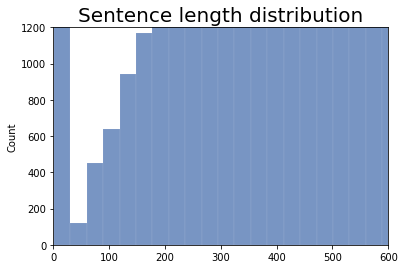

In [ ]:
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(12,9)})
length_dist = [len(x.split(" ")) for x in X]
sns.histplot(length_dist,palette="pastel")
ax.patch.set_visible(False)
ax.set_xlim(0,600)
ax.set_ylim(0,1200)
ax.set_title("Sentence length distribution",fontsize=20);
plt.show()

In [ ]:
X = tokenizer.texts_to_sequences(X)

max_length = max([len(x) for x in X])
vocab_size = len(tokenizer.word_index)+1

print("Vocabulary size: {}".format(vocab_size))
print("max length of sentence: {}".format(max_length))

Vocabulary size: 1829
max length of sentence: 7894


In [ ]:
# Padding the reviews [Pads sequences to the same length.]
X = pad_sequences(X, padding='post', maxlen=600)

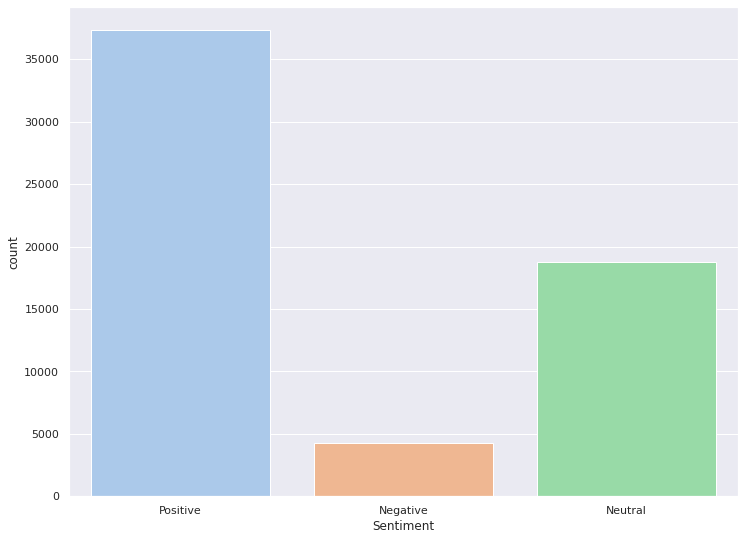

In [ ]:
sns.countplot(data=data_rating,x="Sentiment",palette="pastel");

In [ ]:
# Preparing data for visualization 
Viz_1 = data_rating[['Ratings_overall','Sentiment']].value_counts().rename_axis(['Ratings_overall','Sentiment']).reset_index(name='counts')

# Plotting the Bar Graph 
fig = px.bar(x=Viz_1.Ratings_overall, y=Viz_1.counts, color=Viz_1.Sentiment,color_discrete_sequence=px.colors.qualitative.Pastel,title="Sentiment & Ratings",labels={'x':'Ratings','y':'Total Number'})
fig.show()

In [ ]:
#Viz2 Data preparation 
Viz_2 = data_rating['Ratings_overall'].value_counts().rename_axis(['Ratings_overall']).reset_index(name='counts')
    
# Plotting  pie chart for ratings
fig_pie = px.pie(values=Viz_2.counts, names=Viz_2.Ratings_overall, title='Rating Distribution of the data',color_discrete_sequence=px.colors.qualitative.Pastel)
fig_pie.show()

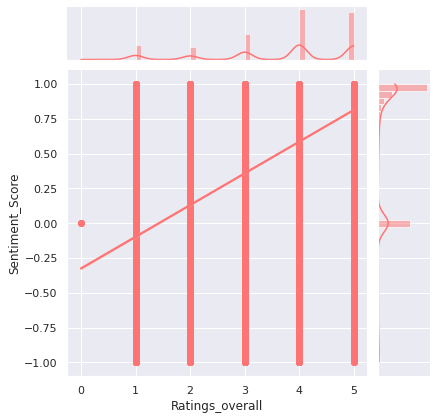

In [ ]:
# Jointplot on the basis of Rating and Sentiment Score of the data
jp = sns.jointplot(data=data_rating,x='Ratings_overall',y='Sentiment_Score',kind="reg",color='#ff7373')
# jp.fig.suptitle('Jointplot on the basis of Rating and Sentiment Score of the data',fontsize=20);

## A word cloud displaying all three sentiments
The hotel room was the most commonly used word in all three Sentiments. There is no doubt that hotel managers can choose whether to improve their customer rating. 

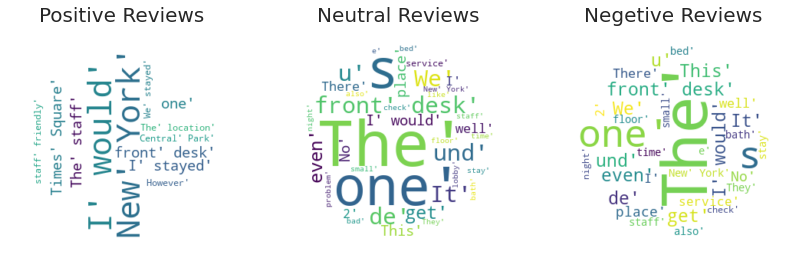

In [ ]:
# Getting all the reviews termed positive in a single string and forming a word cloud of the string
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[14, 14], facecolor = None)

text1 =''
for i in data_rating[data_rating['Sentiment']=='Positive']['Review'].values:
    text1+=i + ' '

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc1 = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc1.generate(text1)

ax1.axis("off")
ax1.imshow(wc1, interpolation="bilinear")
ax1.set_title('Positive Reviews',fontsize=20);

text2 =''
for i in data_rating[data_rating['Sentiment']=='Negative']['Review'].values:
    text2+=i + ' '

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)


wc2 = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc2.generate(text2)

ax2.axis("off")
ax2.imshow(wc2, interpolation="bilinear")
ax2.set_title('Neutral Reviews',fontsize=20);

text3 =''
for i in data_rating[data_rating['Sentiment']=='Negative']['Review'].values:
    text3+=i + ' '

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc3 = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc3.generate(text3)

ax3.axis("off")
ax3.imshow(wc3, interpolation="bilinear")
ax3.set_title('Negetive Reviews',fontsize=20);

plt.show()

#  Tokenizer
Text corpora can be vectorized using the Tokenizer class of Keras. To do this, each text input is converted into either integer sequences or vectors that contain binary coefficients for each token.

In [ ]:
X = df_rating["Review"].values
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)


================================================================================
Step-2 : by Keerti Kolakaluri - Feature Extraction
================================================================================



Dropped Null Values from the data_rating dataset.

Created two np arrays (Reviews, Sentiments) and split them between train and test.

Checked to see if there were any stopwords in the Reviews and it seemed like there were no stopwords.

Performed TF-IDF and CountVectorizer on train_reviews and test_reviews, in case the supervised sentiment analysis methodology was the right fit. 

However, the type of sentiment analysis that would be good for our end product would be unsupervised sentiment analysis. The end result should be able to pull up hotel names and its actual sentiment as well as the predicted sentiment polarity. 

In [ ]:
data_rating = data_rating.dropna()
data_rating[['Review', 'Sentiment']]

,Review,Sentiment
0,"['Stayed', 'king', 'suite', '11', 'night', 'ye...",Positive
1,"['On', 'every', 'visit', 'NYC', ',', 'Hotel', ...",Positive
2,"['This', 'great', 'property', 'Midtown', '.', ...",Positive
3,"['The', 'Andaz', 'nice', 'central', 'location'...",Positive
4,"['I', 'stayed', 'US', 'Andaz', 'property', ','...",Positive
...,...,...
60366,['thelullaby'],Neutral
60367,['PH46'],Neutral
60368,['elfuero'],Neutral
60369,['rachc146'],Neutral


In [ ]:
reviews = np.array(data_rating['Review'].values.astype('U'))
sentiments = np.array(data_rating['Sentiment'].values.astype('U'))

#training and testing the data
train_reviews = reviews[35000:]
train_sentiments = sentiments[35000:]
test_reviews = reviews[35000:]
test_sentiments = sentiments[35000:]

In [ ]:
# This is to see if there are any stopwords within reviews 
stop_words = set(stopwords.words("english"))
for w in reviews:
    if w == stop_words:
        print (w) 

In [ ]:
# Feature Engineering using BOW method(CountVectorizer) and TF-IDF method
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# build BOW features using train reviews
cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, ngram_range=(1,2))
cv_train_features = cv.fit_transform(train_reviews)
# build TFIDF features using train reviews
tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0, ngram_range=(1,2),
                     sublinear_tf=True)
tv_train_features = tv.fit_transform(train_reviews)

# transform test reviews into features
cv_test_features = cv.transform(test_reviews)
tv_test_features = tv.transform(test_reviews)

print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)
print('TFIDF model:> Train features shape:', tv_train_features.shape, ' Test features shape:', tv_test_features.shape)

BOW model:> Train features shape: (25371, 577051)  Test features shape: (25371, 577051)
TFIDF model:> Train features shape: (25371, 577051)  Test features shape: (25371, 577051)


In [ ]:
# If this is an Unsupervised Sentiment Analysis then use Code below to perform the Unsupervised method

test_reviews = reviews[35000:]
test_sentiments = sentiments[35000:]
sample_review_ids = [1000, 1592, 50]

================================================================================
Step-3 : by Bhavika Sharma - Main Functionality (Sentiment Analysis)
================================================================================






In [ ]:
test_reviews

array(['[\'This\', \'good\', \'location\', \'.\', \'Service\', \'quick\', \'fast\', \'.\', \'The\', \'musty\', \'old\', \'smell\', \'.\', \'Got\', \'used\', \'stayed\', \'longer\', \'.\', \'It\', \'clean\', \'needed\', \'repair\', \'remodel\', \'.\', \'Tiles\', \'shower\', \'looked\', \'ready\', \'fall\', \'.\', \'Did\', "n\'t", \'see\', \'bed\', \'bug\', \'noted\', \'another\', \'review\', \'.\', \'I\', \'checked\', \'.\', \'Bed\', \'fine\', \'.\', \'I\', \'would\', \'stay\', \'smell\', \'.\', \'Located\', \'near\', \'lot\', \'tourist\', \'area\', \'.\', \'Did\', \'try\', \'breakfast\', \'.\', \'Easy\', \'checkout\', \'.\']',
       '[\'Currently\', \'travelling\', \'around\', \'world\', \'currently\', \'``\', "\'\'", \'.\', \'Room\', \'basic\', \'clean\', \'&\', \'.\', \'Location\', \'excellent\', \'Central\', \'Park\', \'&\', \'Down\', \'Town\', \'.\', \'There\', \'fridge\', \',\', \'drinking\', \'glass\', \'(\', \'US\', \'$\', \'5\', \'per\', \'glass\', \'Lobby\', \'Bar\', \'deposi